In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pearsonr = stats.pearsonr

# Set the seed to 42
np.random.seed(42)

In [2]:
movies = pd.read_csv("./the-movies-dataset/movies_metadata.csv")
movies.head()

/var/folders/ln/j2mkfdns4dxfkp1xwg6d5k7c0000gn/T/ipykernel_1424/1527773947.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("./the-movies-dataset/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
# Drop null values
movies.dropna(inplace=True)

# Convert the variables into int/float dtypes
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce').dt.month
movies['budget'] = movies['budget'].astype(int)
movies['runtime'] = movies['runtime'].astype(int)
movies['popularity'] = movies['popularity'].astype(float)

# print one of each
print(movies['release_date'].head(1))
print(movies['genres'].head(1))
print(movies['budget'].head(1))
print(movies['runtime'].head(1))

9    11
Name: release_date, dtype: int64
9    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...
Name: genres, dtype: object
9    58000000
Name: budget, dtype: int64
9    130
Name: runtime, dtype: int64


Significance level (α): 0.05

Correlation Matrix with p-values:
              popularity  release_date   runtime    budget   revenue
popularity      1.000000     -0.009426  0.162796  0.288269  0.423807
release_date   -0.009426      1.000000  0.011873 -0.016768  0.018981
runtime         0.162796      0.011873  1.000000  0.381383  0.386119
budget          0.288269     -0.016768  0.381383  1.000000  0.807194
revenue         0.423807      0.018981  0.386119  0.807194  1.000000

P-values:
              release_date       runtime         budget        revenue  \
popularity        0.804364  1.657670e-05   9.953980e-15   1.398373e-31   
release_date           NaN  7.550313e-01   6.594661e-01   6.179058e-01   
runtime           0.755031           NaN   2.050530e-25   4.644525e-26   
budget            0.659466  2.050530e-25            NaN  2.393979e-160   
revenue           0.617906  4.644525e-26  2.393979e-160            NaN   

                popularity  
popularity             NaN  
release_

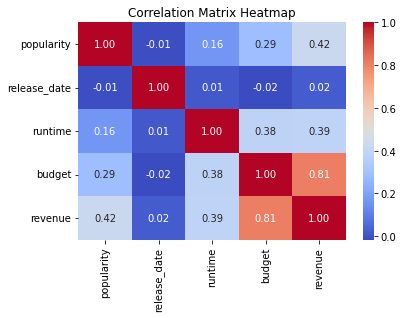

In [4]:
# Set significance level (α)
alpha = 0.05

# Get the correlations
correlation_matrix = movies[['popularity', 'release_date', 'runtime', 'budget', 'revenue']].corr()

# Calculate p-values
p_values = pd.DataFrame() # Create a DataFrame to store p-values
for column1 in correlation_matrix.columns:
    for column2 in correlation_matrix.columns:
        if column1 != column2:
            p_values.loc[column1, column2] = pearsonr(movies[column1], movies[column2])[1]

# Print α
print("Significance level (α):", alpha)

# Print correlation matrix with p-values and significance levels
print("\nCorrelation Matrix with p-values:")
print(correlation_matrix)
print("\nP-values:")
print(p_values)

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

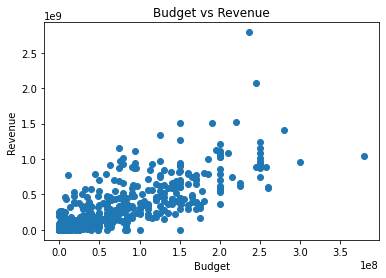

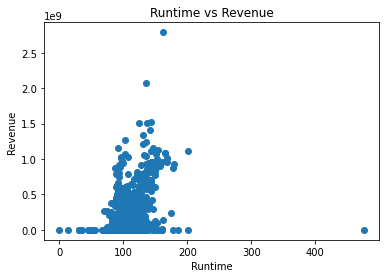

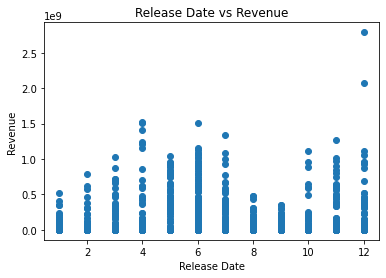

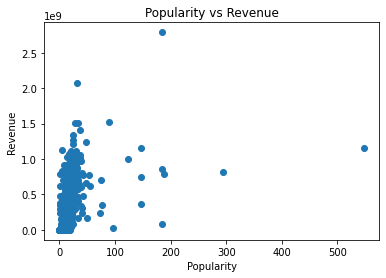

In [5]:
# Scatter plots
plt.scatter(movies['budget'], movies['revenue'])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Budget vs Revenue")
plt.show()

plt.scatter(movies['runtime'], movies['revenue'])
plt.xlabel("Runtime")
plt.ylabel("Revenue")
plt.title("Runtime vs Revenue")
plt.show()

plt.scatter(movies['release_date'], movies['revenue'])
plt.xlabel("Release Date")
plt.ylabel("Revenue")
plt.title("Release Date vs Revenue")
plt.show()

plt.scatter(movies['popularity'], movies['revenue'])
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.title("Popularity vs Revenue")
plt.show()


In [6]:
X = movies[['budget', 'runtime', 'release_date', 'popularity']]
y = movies['revenue']

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=5)

results = []
for train, test in kfold.split(X):
    model = Sequential()
    model.add(Dense(64, input_dim=4, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X.iloc[train], y.iloc[train], epochs=25, batch_size=32)
    y_pred = model.predict(X.iloc[test])
    mse = mean_squared_error(y.iloc[test], y_pred)
    rmse = np.sqrt(mse)
    rmse = (rmse / np.mean(y.iloc[test])) * 100
    results.append(rmse)

print(results)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/25


2024-04-06 09:30:22.709275: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-06 09:30:22.709382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-04-06 09:30:22.850353: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-06 09:30:23.019344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 12ms/step - loss: 166269110424961024.0000
Epoch 2/25
18/18 [==============================] - 0s 6ms/step - loss: 145931237687558144.0000
Epoch 3/25
18/18 [==============================] - 0s 6ms/step - loss: 122449594918371328.0000
Epoch 4/25
18/18 [==============================] - 0s 7ms/step - loss: 100194672118333440.0000
Epoch 5/25
18/18 [==============================] - 0s 6ms/step - loss: 74704762771079168.0000
Epoch 6/25
18/18 [==============================] - 0s 6ms/step - loss: 56644274967543808.0000
Epoch 7/25
18/18 [==============================] - 0s 6ms/step - loss: 42362430671552512.0000
Epoch 8/25
18/18 [==============================] - 0s 6ms/step - loss: 43470781342023680.0000
Epoch 9/25
18/18 [==============================] - 0s 6ms/step - loss: 45126890666590208.0000
Epoch 10/25
18/18 [==============================] - 0s 6ms/step - loss: 41047045397544960.0000
Epoch 11/25
18/18 [==============================] - 0s

2024-04-06 09:30:26.152205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/18 [>.............................] - ETA: 4s - loss: 242201881655377920.0000

2024-04-06 09:30:26.372625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 11ms/step - loss: 172305944657526784.0000
Epoch 2/25
18/18 [==============================] - 0s 6ms/step - loss: 153840316883927040.0000
Epoch 3/25
18/18 [==============================] - 0s 6ms/step - loss: 129083446784950272.0000
Epoch 4/25
18/18 [==============================] - 0s 6ms/step - loss: 101544374181036032.0000
Epoch 5/25
18/18 [==============================] - 0s 6ms/step - loss: 78145151834259456.0000
Epoch 6/25
18/18 [==============================] - 0s 6ms/step - loss: 58129564852813824.0000
Epoch 7/25
18/18 [==============================] - 0s 6ms/step - loss: 49714766142242816.0000
Epoch 8/25
18/18 [==============================] - 0s 6ms/step - loss: 52109455222898688.0000
Epoch 9/25
18/18 [==============================] - 0s 6ms/step - loss: 46664424534048768.0000
Epoch 10/25
18/18 [==============================] - 0s 6ms/step - loss: 46764557401587712.0000
Epoch 11/25
18/18 [==============================] - 0s

2024-04-06 09:30:29.387483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/18 [>.............................] - ETA: 4s - loss: 225125761701380096.0000

2024-04-06 09:30:29.594126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 0s 12ms/step - loss: 147062446173978624.0000
Epoch 2/25
18/18 [==============================] - 0s 7ms/step - loss: 128707662916354048.0000
Epoch 3/25
18/18 [==============================] - 0s 6ms/step - loss: 105308913015980032.0000
Epoch 4/25
18/18 [==============================] - 0s 6ms/step - loss: 80923858235817984.0000
Epoch 5/25
18/18 [==============================] - 0s 6ms/step - loss: 59519588068491264.0000
Epoch 6/25
18/18 [==============================] - 0s 6ms/step - loss: 48646294243115008.0000
Epoch 7/25
18/18 [==============================] - 0s 6ms/step - loss: 43473573070766080.0000
Epoch 8/25
18/18 [==============================] - 0s 6ms/step - loss: 40716702282940416.0000
Epoch 9/25
18/18 [==============================] - 0s 6ms/step - loss: 39058673107992576.0000
Epoch 10/25
18/18 [==============================] - 0s 6ms/step - loss: 36379558408093696.0000
Epoch 11/25
18/18 [==============================] - 0s 

2024-04-06 09:30:32.656933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/18 [>.............................] - ETA: 5s - loss: 149649322156228608.0000

2024-04-06 09:30:32.865094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 12ms/step - loss: 157715683054977024.0000
Epoch 2/25
18/18 [==============================] - 0s 6ms/step - loss: 139096630459629568.0000
Epoch 3/25
18/18 [==============================] - 0s 6ms/step - loss: 116416849494671360.0000
Epoch 4/25
18/18 [==============================] - 0s 6ms/step - loss: 92549278144135168.0000
Epoch 5/25
18/18 [==============================] - 0s 6ms/step - loss: 71582828353028096.0000
Epoch 6/25
18/18 [==============================] - 0s 6ms/step - loss: 52064499800211456.0000
Epoch 7/25
18/18 [==============================] - 0s 6ms/step - loss: 48498465763753984.0000
Epoch 8/25
18/18 [==============================] - 0s 7ms/step - loss: 42937380763598848.0000
Epoch 9/25
18/18 [==============================] - 0s 6ms/step - loss: 48877904649519104.0000
Epoch 10/25
18/18 [==============================] - 0s 6ms/step - loss: 47244146334760960.0000
Epoch 11/25
18/18 [==============================] - 0s 

2024-04-06 09:30:35.947267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/25
 1/18 [>.............................] - ETA: 5s - loss: 112925702507986944.0000

2024-04-06 09:30:36.407556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 1s 11ms/step - loss: 154370384567730176.0000
Epoch 2/25
18/18 [==============================] - 0s 6ms/step - loss: 136463394600386560.0000
Epoch 3/25
18/18 [==============================] - 0s 6ms/step - loss: 114572358609534976.0000
Epoch 4/25
18/18 [==============================] - 0s 6ms/step - loss: 87313764549918720.0000
Epoch 5/25
18/18 [==============================] - 0s 6ms/step - loss: 64344008867971072.0000
Epoch 6/25
18/18 [==============================] - 0s 6ms/step - loss: 49635880477917184.0000
Epoch 7/25
18/18 [==============================] - 0s 6ms/step - loss: 43531825712201728.0000
Epoch 8/25
18/18 [==============================] - 0s 6ms/step - loss: 42310190984331264.0000
Epoch 9/25
18/18 [==============================] - 0s 6ms/step - loss: 42558264000380928.0000
Epoch 10/25
18/18 [==============================] - 0s 6ms/step - loss: 38899437195493376.0000
Epoch 11/25
18/18 [==============================] - 0s 

2024-04-06 09:30:39.489375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [7]:
# Param count
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'Percentage Error')

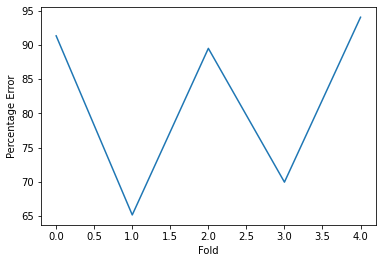

In [8]:
# Plot the results
plt.plot(results)
plt.xlabel("Fold")
plt.ylabel("Percentage Error")